In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


def warn(*args, **kwargs):
    pass


import warnings

warnings.warn = warn

### 1. Скачайте архив с наборами данных для задачи классификации или изучите API сайта OpenML.

Скачано ~ 1000 наборов данных в формате `arff`

In [2]:
BASE_PATH = "../../datasets/OpenML"
DATA_PATH = f"{BASE_PATH}/data"

datasets_meta = pd.read_csv(f"{BASE_PATH}/meta.csv")
datasets_meta.head()

,id,length,target
0,864.arff,60,binaryClass
1,921.arff,132,binaryClass
2,999.arff,226,binaryClass
3,560.arff,252,class
4,1543.arff,1080,Class


In [3]:
!ls {DATA_PATH} | head -n 5

1.arff
10.arff
1001.arff
1003.arff
1005.arff


## 2. Реализуйте несколько мета-признаков из каждой группы: базовые, статистические и структурные.

Функции реализованы в моей мини-библиотеке *Metafora*

[metafora/meta/](../../metafora/meta)

* [general](../../metafora/meta/general) – базовые мета-признаки
* [statistics](../../metafora/meta/statistical) – статистические мета-признаки
* [structured](../../metafora/meta/structured) – структурные мета-признаки
* [pairwise](../../metafora/meta/pairwise) – мета-признаки, описывающие взаимодействия столбцов

In [4]:
from metafora.meta.pipeline import Pipeline
from metafora.meta.statistical.numeric import NumericExtractor

from metafora.meta.variants import *

In [5]:
pipe = Pipeline(
    NumericExtractor(
        columns=["A"],
        column_aggregators=["max", "min", "median"],
        post_aggregators=["std", "var"],
    )
)

pipe

Pipeline(
	NumericExtractor(
		max => std
		max => var
		min => std
		min => var
		median => std
		median => var
	)
)

## 3. Выберите один набор данных. Измените в нём порядок строк, столбцов и категорий. Убедитесь, что мета-признаки от этого не изменились.

Возьмем набор данных *wine* из пакета *scikit-learn*, затем получим мета–признаки до и после изменения порядка, сравним полученные мета-признаки

In [6]:
import sklearn.datasets as data

wine = data.load_wine(as_frame=True).data
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
pipe_maker = lambda: NumericExtractor(
    wine.columns.tolist(),
    column_aggregators=["max", "min", "median", "kurtosis"],
    post_aggregators=list(NumericaVariants)
)

In [8]:
before_shuffling_features = pipe_maker().fit_transform(wine)
before_shuffling_features

MetaFeatures(
	('max_sum', 1927.77)
	('max_max', 1680.0)
	('max_min', 0.66)
	('max_std', 462.2572358726975)
	('max_mean', 148.29)
	('max_median', 5.08)
	('max_var', 213681.75211666667)
	('max_kurtosis', 12.707359959093013)
	('min_sum', 376.62)
	('min_max', 278.0)
	('min_min', 0.13)
	('min_std', 77.19790028033344)
	('min_mean', 28.970769230769232)
	('min_median', 1.27)
	('min_var', 5959.515807692307)
	('min_kurtosis', 11.037266905972466)
	('median_sum', 823.095)
	('median_max', 673.5)
	('median_min', 0.34)
	('median_std', 185.22393743790244)
	('median_mean', 63.315000000000005)
	('median_median', 2.36)
	('median_var', 34307.90699999999)
	('median_kurtosis', 12.327740571107737)
	('kurtosis_sum', 0.08765642995098655)
	('kurtosis_max', 2.1049913235905557)
	('kurtosis_min', -1.0864345274098695)
	('kurtosis_std', 0.9348104340882)
	('kurtosis_mean', 0.006742802303922042)
	('kurtosis_median', -0.24840310614613248)
	('kurtosis_var', 0.8738705476801688)
	('kurtosis_kurtosis', 0.4988070844761654)

Сделаем случайные перестановки строк и столбцов

In [9]:
import numpy as np

shuffled_columns = np.random.permutation(wine.columns)
shuffled_index = np.random.permutation(wine.index)

In [10]:
shuffled_columns[:5], shuffled_index[:5]

(array(['od280/od315_of_diluted_wines', 'proline', 'hue',
        'proanthocyanins', 'total_phenols'], dtype=object),
 array([ 70,  54, 101, 134, 118]))

In [11]:
shuffled_wine = wine.iloc[shuffled_index][shuffled_columns]
shuffled_wine.head(2)

,od280/od315_of_diluted_wines,proline,hue,proanthocyanins,total_phenols,flavanoids,magnesium,alcalinity_of_ash,alcohol,malic_acid,ash,nonflavanoid_phenols,color_intensity
70,1.82,870.0,0.906,1.46,1.1,1.02,103.0,20.4,12.29,1.61,2.21,0.37,3.05
54,3.20,1060.0,0.920,1.62,2.6,2.90,118.0,16.4,13.74,1.67,2.25,0.21,5.85


In [12]:
wine.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [13]:
after_shuffling_features = pipe_maker().fit_transform(shuffled_wine)
after_shuffling_features

MetaFeatures(
	('max_sum', 1927.77)
	('max_max', 1680.0)
	('max_min', 0.66)
	('max_std', 462.2572358726975)
	('max_mean', 148.29)
	('max_median', 5.08)
	('max_var', 213681.75211666667)
	('max_kurtosis', 12.707359959093013)
	('min_sum', 376.62)
	('min_max', 278.0)
	('min_min', 0.13)
	('min_std', 77.19790028033344)
	('min_mean', 28.970769230769232)
	('min_median', 1.27)
	('min_var', 5959.515807692307)
	('min_kurtosis', 11.037266905972466)
	('median_sum', 823.095)
	('median_max', 673.5)
	('median_min', 0.34)
	('median_std', 185.22393743790244)
	('median_mean', 63.315000000000005)
	('median_median', 2.36)
	('median_var', 34307.90699999999)
	('median_kurtosis', 12.327740571107737)
	('kurtosis_sum', 0.08765642995098699)
	('kurtosis_max', 2.1049913235905557)
	('kurtosis_min', -1.0864345274098686)
	('kurtosis_std', 0.9348104340881996)
	('kurtosis_mean', 0.006742802303922076)
	('kurtosis_median', -0.24840310614613248)
	('kurtosis_var', 0.8738705476801681)
	('kurtosis_kurtosis', 0.49880708447616

In [14]:
for (name_0, value_0), (name_1, value_1) in zip(before_shuffling_features.features, after_shuffling_features.features):
    assert name_0 == name_1 and round(value_0, 5) == round(value_1,
                                                           5), f"Feature {name_0, value_0} doesn't match to feature {name_1, value_1}"

Мета-признаки не изменились!

## 4. Выберите не менее трёх алгоритмов обучения с учителем и меру оценки алгоритма обучения (валидацию)

In [15]:
datasets_meta.target.value_counts()

binaryClass    245
Class           72
class           43
Name: target, dtype: int64

Возьмем алгоритмы для решения задачи классификации

* _Decision Tree_
* _SVM_
* _AdaBoost_
* _Random forest_

В качестве метрики оценки качества работы алгоритма возьмем *F1-Score*

Возьмем наборы данных которые относятся к задаче классификации, так же возьмем те наборы данных, которые содержат меньше 75_000 обучаемых данных

In [16]:
datasets_meta["length"].describe()

count      360.000000
mean       761.633333
std       1748.900805
min         10.000000
25%        100.000000
50%        250.000000
75%        528.000000
max      10668.000000
Name: length, dtype: float64

In [17]:
datasets_meta = datasets_meta[datasets_meta["length"] > 50]

In [18]:
datasets_meta.head()

,id,length,target
0,864.arff,60,binaryClass
1,921.arff,132,binaryClass
2,999.arff,226,binaryClass
3,560.arff,252,class
4,1543.arff,1080,Class


In [19]:
def transform_value(v):
    if isinstance(v, bytes):
        decoded = v.decode("UTF-8")

        if decoded == "?":
            return np.nan

        return decoded

    return v


def df_from_arff(raw_arff):
    dataset, meta = raw_arff

    dataset = dataset[1:]

    df_data = pd.DataFrame(
        [[transform_value(v) for v in row] for row in dataset],
        columns=meta.names()
    )

    columns = df_data.columns.tolist()
    columns[-1] = "target_class"

    df_data.columns = columns

    numeric_cols_mask = df_data.dtypes == "float64"
    numeric_cols = df_data.dtypes[numeric_cols_mask].index.tolist()
    categorical_cols = df_data.dtypes[~numeric_cols_mask].index.tolist()

    return df_data, numeric_cols, categorical_cols

In [20]:
import os
from tqdm import tqdm
from scipy.io import arff

datasets = []

for name in tqdm(datasets_meta["id"], desc="Loafing datasets.."):
    path = f"{DATA_PATH}/{name}"

    if os.path.exists(path):
        try:
            raw_arff = arff.loadarff(path)
            df, nums, cats = df_from_arff(raw_arff)

            if len(nums) != 0:
                scaler = StandardScaler()
                df[nums] = scaler.fit_transform(df[nums])

            datasets.append((df, nums, cats))
        except Exception:
            continue

len(datasets)

Loafing datasets..:  33%|███▎      | 111/337 [00:01<00:02, 107.46it/s]/Users/da.korolev/Documents/university/auto-ml/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/da.korolev/Documents/university/auto-ml/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/da.korolev/Documents/university/auto-ml/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
Loafing datasets..:  81%|████████  | 272/337 [00:02<00:00, 115.60it/s]/Users/da.korolev/Documents/university/auto-ml/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:981: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sampl

337

In [21]:
datasets_meta.head()

,id,length,target
0,864.arff,60,binaryClass
1,921.arff,132,binaryClass
2,999.arff,226,binaryClass
3,560.arff,252,class
4,1543.arff,1080,Class


In [22]:
new_datasets = []

for df, num_cols, cat_cols in datasets:
    if df["target_class"].dtype == "float64":
        continue

    if (df["target_class"].value_counts() <= 5).sum() > 0:
        continue

    new_datasets.append((df, num_cols, cat_cols))

datasets = new_datasets
len(datasets)

311

## 5. Постройте мета-набор данных. Для каждого набора данных определите наилучший алгоритм для него.

In [23]:
from metafora.meta import general
from metafora.meta.statistical import categorical
from metafora.meta.statistical import numeric
from metafora.meta import pairwise
from metafora.meta import structured
from metafora.meta.pipeline import Pipeline
from metafora.meta.variants import NumericaVariants, CorrelationVariants, CategoricalVariants


def meta_features_extractor(numeric_columns, cat_columns, label):
    return Pipeline(
        general.SparsityExtractor(post_aggregators=["max", "std", "var", "mean", "median"]),
        general.ShapeExtractor(),
        general.CatNumColumnsRateExtractor(),
        general.ClassesNumberExtractor(cat_columns, list(NumericaVariants)),

        categorical.CategoricalExtractor(cat_columns, list(CategoricalVariants), list(NumericaVariants)),
        numeric.NumericExtractor(numeric_columns, ["max", "min", "median", "kurtosis"], list(NumericaVariants)),

        pairwise.CorrelationExtractor(numeric_columns, list(CorrelationVariants), list(NumericaVariants)),

        structured.SVMExtractor(label, list(NumericaVariants)),
        structured.DecisionTreeClassifierExtractor(label, list(NumericaVariants))
    )

In [24]:
meta_dataset = []

for (df, numeric_columns, cat_columns) in tqdm(datasets):
    pipeline = meta_features_extractor(numeric_columns, cat_columns, label="target_class")
    metafeat = pipeline.fit_transform(df)

    meta_dataset.append(metafeat)

len(meta_dataset)

100%|██████████| 311/311 [00:35<00:00,  8.66it/s]


311

In [25]:
dfs = [pd.DataFrame([meta.values], columns=meta.columns) for meta in meta_dataset]

In [26]:
meta = pd.concat(dfs)
meta.shape

(311, 178)

In [27]:
from sklearn.preprocessing import MinMaxScaler

meta[:] = MinMaxScaler().fit_transform(meta[:])

In [28]:
meta.head()

,sparsity_max,sparsity_std,sparsity_var,sparsity_mean,sparsity_median,features_objects_rate,cat_cols_rate,num_cols_rate,unique_sum,unique_max,...,tree_child_left_var,tree_child_left_kurtosis,tree_child_right_sum,tree_child_right_max,tree_child_right_min,tree_child_right_std,tree_child_right_mean,tree_child_right_median,tree_child_right_var,tree_child_right_kurtosis
0,0.000000,0.000000,0.000000,0.000000,0.0,0.035060,0.242500,0.757500,0.008082,0.033675,...,0.001267,0.442713,0.001634,0.035616,0.0,0.038060,0.041300,0.0,0.001977,0.805689
0,0.000000,0.000000,0.000000,0.000000,0.0,0.007820,0.495000,0.505000,0.004530,0.022675,...,0.000879,0.481335,0.000983,0.027397,0.0,0.028125,0.031338,0.0,0.001186,0.842575
0,0.982222,0.284515,0.080949,0.031689,0.0,0.080569,1.000000,0.000000,0.086800,0.030887,...,0.000709,0.356386,0.000806,0.024658,0.0,0.025640,0.028129,0.0,0.001018,0.896693
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000864,0.242500,0.757500,0.000510,0.004403,...,0.066963,0.351647,0.068840,0.257534,0.0,0.258903,0.264188,0.0,0.069801,0.974446
0,0.000000,0.000000,0.000000,0.000000,0.0,0.010685,0.182381,0.817619,0.024642,0.180008,...,0.017707,0.358409,0.018572,0.131507,0.0,0.132928,0.137510,0.0,0.019334,0.967265


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


def build_models():
    return [
        ("SVC", LinearSVC(max_iter=2500, tol=1e-3, C=2)),
        ("Forest", RandomForestClassifier(n_estimators=75, max_depth=6)),
        ("AdaBoost", AdaBoostClassifier(n_estimators=100, learning_rate=0.1)),
        ("DT", DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=3, max_depth=10))
    ]


def train(x, y):
    models = build_models()
    scores = []

    for model_name, model in models:
        score = cross_val_score(model, x, y, cv=5, scoring='f1_weighted').mean()
        scores.append(score)

    best_algo_index = np.array(scores).argmax()

    return models[best_algo_index][0]

In [30]:
algos = []

for df, _, _ in tqdm(datasets):
    X = df.drop(columns=["target_class"]).fillna(-1)
    X = pd.get_dummies(X)
    y = LabelEncoder().fit_transform(df["target_class"])

    best_algo = train(X, y)

    algos.append(best_algo)

100%|██████████| 311/311 [04:29<00:00,  1.15it/s]


In [31]:
meta["target_algo"] = algos
meta["target_algo"].value_counts()

Forest      102
SVC          96
AdaBoost     61
DT           52
Name: target_algo, dtype: int64

## 6. Визуализируйте мета-набор данных проекцией на двумерном графике. Используйте разные цвета для разных мета-классов.

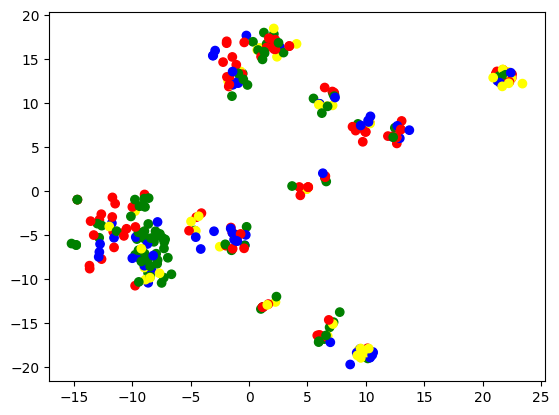

In [275]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def get_color(model_name):
    if model_name == "Forest":
        return "green"
    elif model_name == "SVC":
        return "red"
    elif model_name == "AdaBoost":
        return "blue"
    else:
        return "yellow"



tsne = TSNE(n_components=2, init="random", learning_rate="auto")

embeddings = tsne.fit_transform(meta.drop(columns=["target_algo"]).fillna(-1))

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=meta["target_algo"].apply(get_color))

## 7. Протестируйте несколько алгоритмов обучения с учителем (включая наивный алгоритм) на полученном наборе данных.

In [265]:
from catboost import Pool
from catboost import cv
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

params = dict(
    learning_rate=0.05,
    iterations=100,
    verbose=0,
    loss_function="MultiClassOneVsAll",
    eval_metric="TotalF1",
    train_dir="./train",
    l2_leaf_reg=1e-3,
    leaf_estimation_iterations=15,
    max_ctr_complexity=5,
    nan_mode="Max",
    auto_class_weights="Balanced",
    use_best_model=True
)

X, y = meta.drop(columns=["target_algo"]), meta["target_algo"]

encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

pool = Pool(X_train, y_train)

cross = cv(
    pool=pool,
    params=params,
    nfold=8,
    return_models=True
)

Training on fold [0/8]

bestTest = 0.4558435485
bestIteration = 11

Training on fold [1/8]

bestTest = 0.4579481284
bestIteration = 15

Training on fold [2/8]

bestTest = 0.4077597517
bestIteration = 4

Training on fold [3/8]

bestTest = 0.4819661491
bestIteration = 96

Training on fold [4/8]

bestTest = 0.4066884521
bestIteration = 70

Training on fold [5/8]

bestTest = 0.5449548648
bestIteration = 18

Training on fold [6/8]

bestTest = 0.47402788
bestIteration = 27

Training on fold [7/8]

bestTest = 0.5002323569
bestIteration = 36



In [266]:
_, models = cross

In [267]:
preds = [model.predict(X_test, prediction_type="Probability") for model in models]

In [268]:
import numpy as np

preds = np.stack(preds).mean(axis=0).argmax(1)
preds.shape

(32,)

In [269]:
print(f1_score(y_test, preds, average="weighted"))
print(precision_score(y_test, preds, average="weighted"))
print(recall_score(y_test, preds, average="weighted"))

0.5654761904761905
0.6587787212787213
0.59375


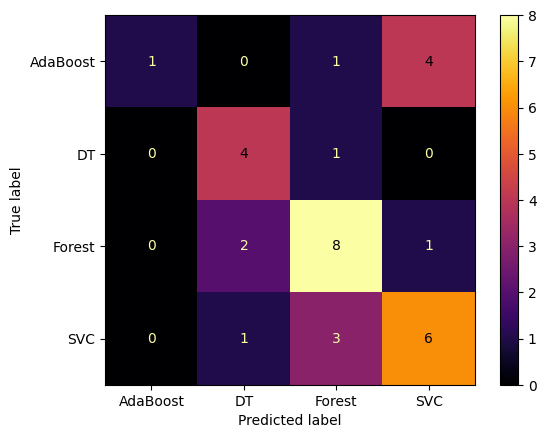

In [270]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(matrix, display_labels=encoder.classes_).plot(cmap="inferno")